In [1]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#%matplotlib inline
#import seaborn as sns

# Data Analysing 
import pandas as pd
import numpy as np

# Graphical analysis
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# for model building
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Database
#import News2cbr.xlsx

# save the model

In [2]:
data=pd.read_excel('News2cbr.xlsx')
data.shape

(127, 14)

In [3]:
data.head()

,LL,PL,PI,OMC,SG,MDD,TS,P1,P2,P3,P4,NO. OF LAYER,lab error,CBR
0,0.0,0.0,0.0,11.0,2.63,3.36,20.0,0.0,0.0,0.8,0.0,1,1,103.0
1,0.0,0.0,0.0,10.0,2.63,5.36,20.0,0.0,0.5,0.0,0.0,1,1,74.0
2,0.0,0.0,0.0,10.0,2.63,4.83,20.0,0.0,0.0,0.8,0.0,1,1,104.0
3,0.0,0.0,0.0,11.0,2.63,4.98,20.0,0.0,0.5,0.0,0.0,1,1,75.0
4,0.0,0.0,0.0,12.0,2.63,3.97,20.0,0.0,0.0,0.8,0.0,1,1,105.0


In [4]:
data.describe()

,LL,PL,PI,OMC,SG,MDD,TS,P1,P2,P3,P4,NO. OF LAYER,lab error,CBR
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.0,127.000000
mean,37.108661,23.791969,13.959213,16.869449,2.652362,11.950677,18.893228,0.180709,0.249764,0.261102,0.138583,1.779528,1.0,17.204606
std,23.903580,15.192163,11.429143,7.836010,0.042733,6.444168,8.236531,0.183749,0.264610,0.331713,0.303955,1.160961,0.0,21.631161
min,0.000000,0.000000,0.000000,8.300000,2.600000,0.001900,2.810000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000
25%,18.000000,14.000000,4.000000,12.000000,2.630000,4.900000,13.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,3.405000
50%,45.000000,28.000000,11.000000,13.900000,2.630000,13.330000,20.000000,0.200000,0.400000,0.000000,0.000000,1.000000,1.0,8.720000
75%,55.000000,35.000000,23.000000,18.000000,2.690000,17.120000,20.000000,0.200000,0.400000,0.600000,0.000000,2.000000,1.0,22.795000
max,71.000000,45.000000,35.000000,35.000000,2.770000,19.620000,40.000000,0.840000,0.840000,0.840000,0.800000,4.000000,1.0,105.000000


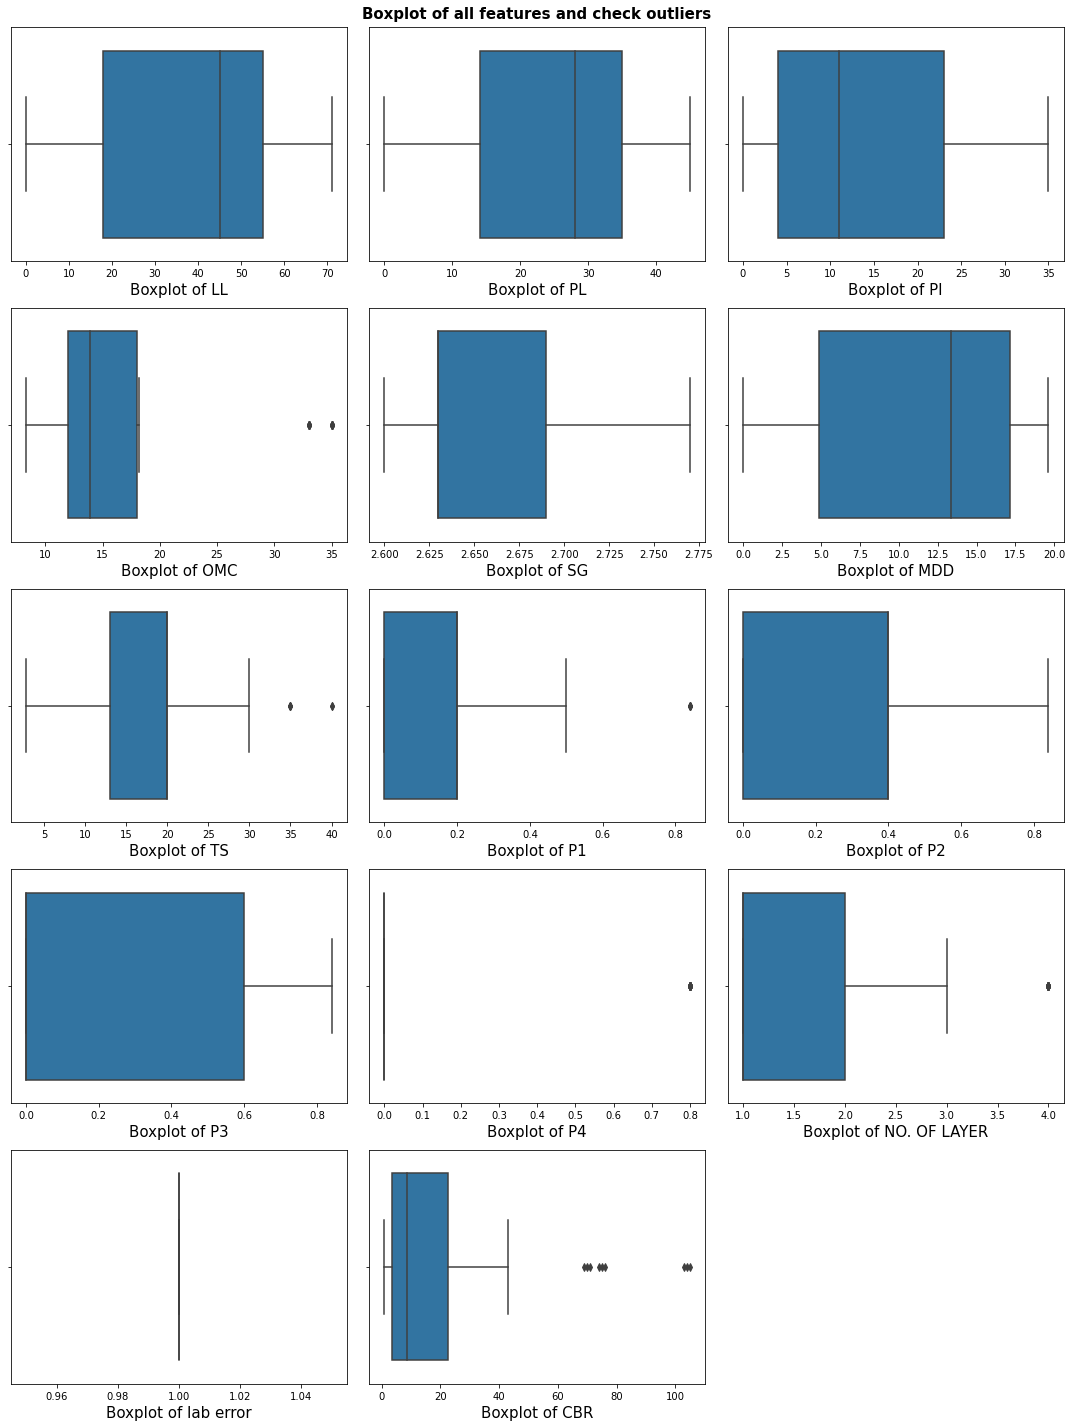

In [5]:
#check the outliers
plt.figure(figsize=(15,20),facecolor='White')
plt.suptitle("Boxplot of all features and check outliers", fontweight = 'bold', fontsize = 15,y = 0.989)
for i in range(0,len(data.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x = data.columns[i], data = data)
    plt.xlabel("Boxplot of {}".format(data.columns[i]),fontsize = 15)
    plt.tight_layout()

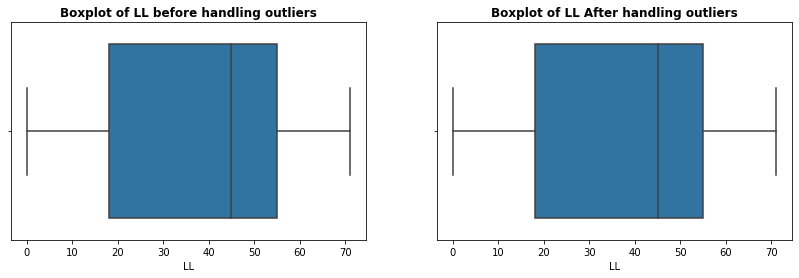

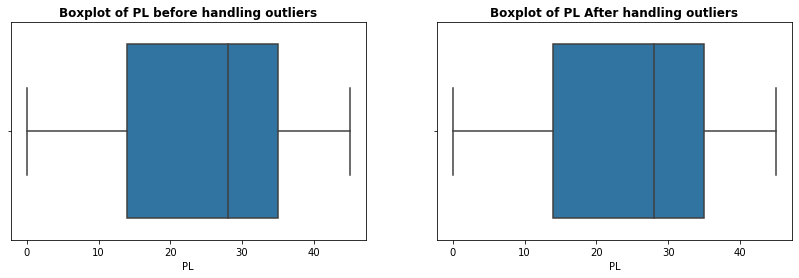

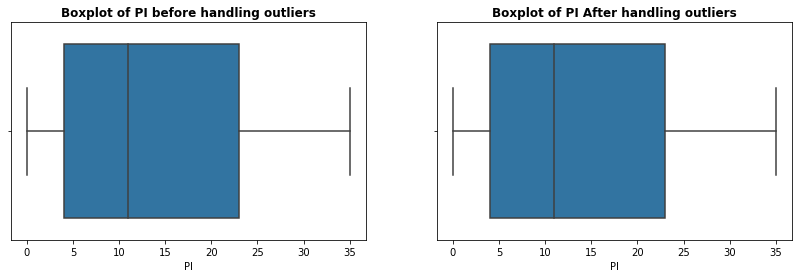

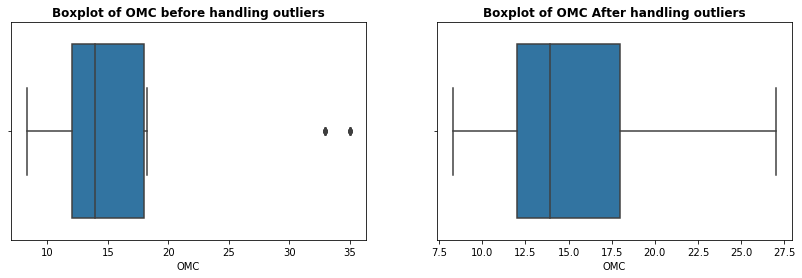

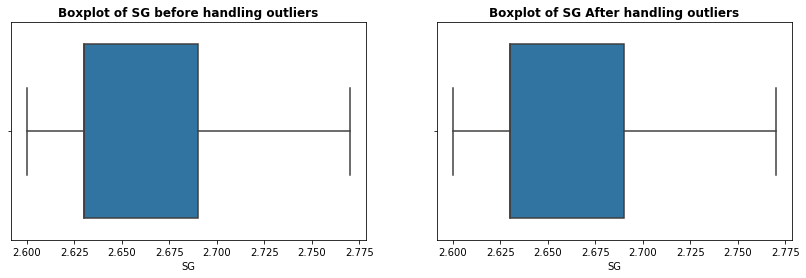

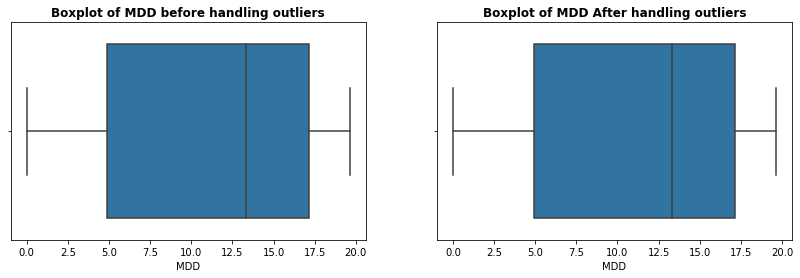

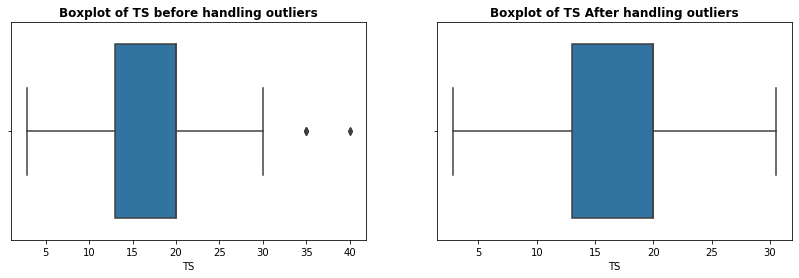

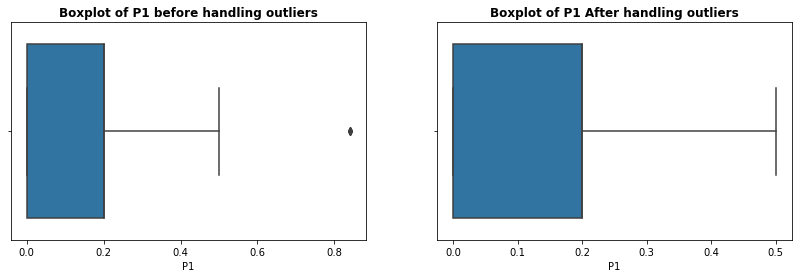

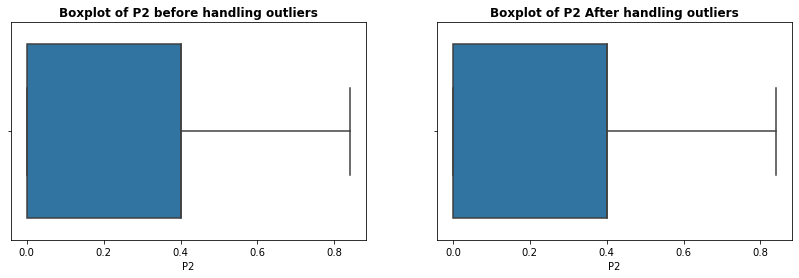

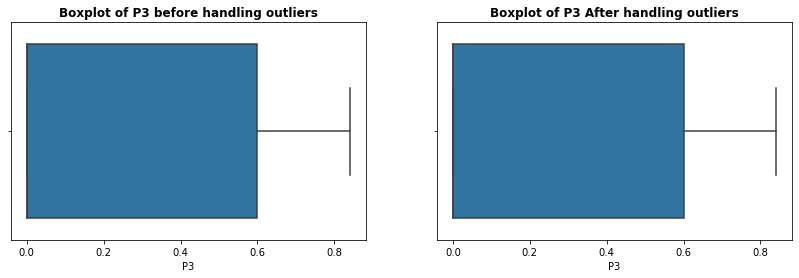

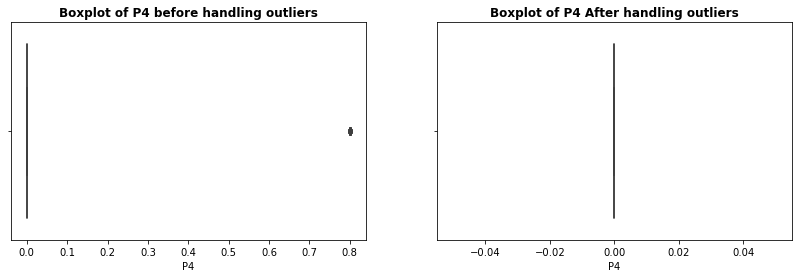

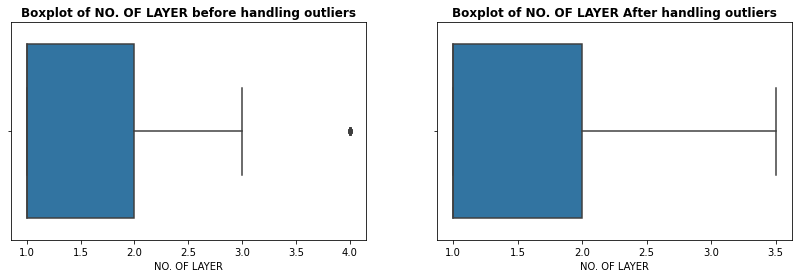

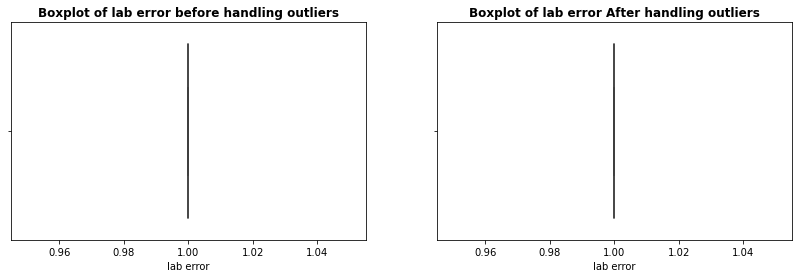

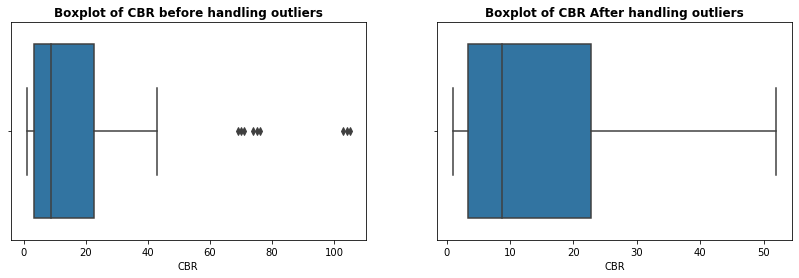

In [6]:
df1 = data.copy()
feature_to_use = df1.columns

for i in range(len(feature_to_use)):
    IQR = df1[feature_to_use[i]].quantile(0.75) - df1[feature_to_use[i]].quantile(0.25)
    Lower_Limit = df1[feature_to_use[i]].quantile(0.25) - (1.5*IQR)
    UPPER_LIMIT = df1[feature_to_use[i]].quantile(0.75) + (1.5*IQR)
    df1[feature_to_use[i]]= np.where(df1[feature_to_use[i]]>UPPER_LIMIT,UPPER_LIMIT,
                                np.where(df1[feature_to_use[i]]<Lower_Limit,Lower_Limit,df1[feature_to_use[i]]))


for fea in feature_to_use:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.boxplot(x = fea, data = data)
    plt.title("Boxplot of {} before handling outliers".format(fea),fontweight = 'bold')

    plt.subplot(122)
    sns.boxplot(x = fea, data = df1)
    plt.title("Boxplot of {} After handling outliers".format(fea),fontweight = 'bold')
    plt.show()

In [10]:
import pandas as pd

data = pd.read_excel('News2cbr.xlsx')
correlation_matrix = data.corr()

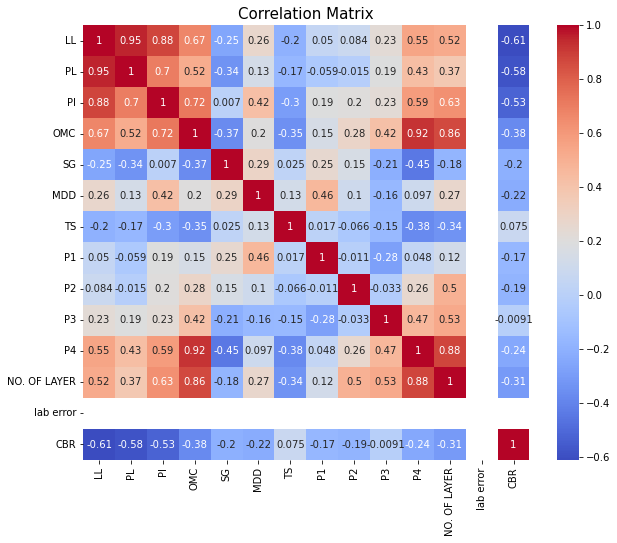

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix", fontsize=15)
plt.show()

In [12]:
x = df1.iloc[:,:-1]
y = df1['CBR']

In [14]:
x.shape,y.shape

((127, 13), (127,))

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training, test, and validation sets
x_train_temp, x_test, y_train_temp, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Further split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_temp, y_train_temp, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_val_scaled = scaler.transform(x_val)

In [16]:
x_train.shape,y_train.shape,

((70, 13), (70,))

In [17]:
x_test.shape,y_test.shape,

((39, 13), (39,))

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

models = {
    "LR": LinearRegression(),
    "RR": Ridge(),
    "LassoReg": Lasso(),
    "SVR": SVR(),
    "RFR": RandomForestRegressor(),
    "BR": BaggingRegressor()
}

param_grid = {
    "RR": {"alpha": [0.001, 0.01, 0.1, 1, 10]},
    "LassoReg": {"alpha": [0.001, 0.01, 0.1, 1, 10]},
    "SVR": {"C": [0.001, 0.01, 0.1, 1, 10], "epsilon": [0.1, 0.01, 0.001]},
    "RFR": {"n_estimators": [10, 50, 100], "max_depth": [None, 5, 10, 20]},
    "BR": {
        "base_estimator": [RandomForestRegressor()],
        "n_estimators": [10, 50, 100]
    }
}

report = []

for model_name, model in models.items():
    if model_name in param_grid:
        grid_search = GridSearchCV(model, param_grid[model_name], scoring="neg_mean_squared_error")
        grid_search.fit(x_train, y_train)
        model = grid_search.best_estimator_

    model.fit(x_train, y_train)   # Training Model

    # Prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training Data performance Matrix
    model_train_mse = mean_squared_error(y_train, y_train_pred)   # Calculate MSE
    model_train_mae = mean_absolute_error(y_train, y_train_pred)  # Calculate MAE
    model_train_r2 = r2_score(y_train, y_train_pred)              # Calculate R^2
    model_train_ad_r2 = 1 - (1 - model_train_r2) * (len(y_train) - 1) / (len(y_train) - x_train.shape[1] - 1)

    # Test Data performance Matrix
    model_test_mse = mean_squared_error(y_test, y_test_pred)   # Calculate MSE
    model_test_mae = mean_absolute_error(y_test, y_test_pred)  # Calculate MAE
    model_test_r2 = r2_score(y_test, y_test_pred)              # Calculate R^2
    model_test_ad_r2 = 1 - (1 - model_test_r2) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)

    report.append({
        "model": model_name,
        'Train Mean Squared Error': model_train_mse,
        'Test Mean Squared Error': model_test_mse,
        'Train Mean Absolute Error': model_train_mae,
        'Test Mean Absolute Error': model_test_mae,
        'Train R Sqaure': model_train_r2,
        'Test R Sqaure': model_test_r2,
        'Train Adj R Sqaure': model_train_ad_r2,
        'Test Adj R Sqaure': model_test_ad_r2
    })

all_models_df = pd.DataFrame(report)
all_models_df

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
0,LR,48.443245,66.165924,5.162698,6.563093,0.780506,0.674563,0.729552,0.505335
1,RR,49.488753,70.399886,5.264607,6.710259,0.775769,0.653738,0.723715,0.473681
2,LassoReg,48.580877,66.558594,5.192842,6.568074,0.779882,0.672631,0.728784,0.502399
3,SVR,119.838631,108.487060,6.238843,6.556657,0.457017,0.466406,0.330967,0.188937
4,RFR,5.342914,22.054746,1.324356,3.272608,0.975792,0.891524,0.970172,0.835116
5,BR,17.421170,54.123993,2.445983,5.247461,0.921066,0.733791,0.902741,0.595362


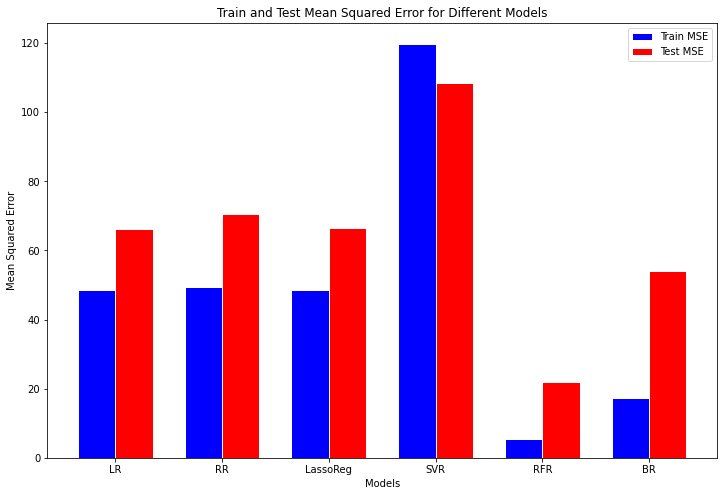

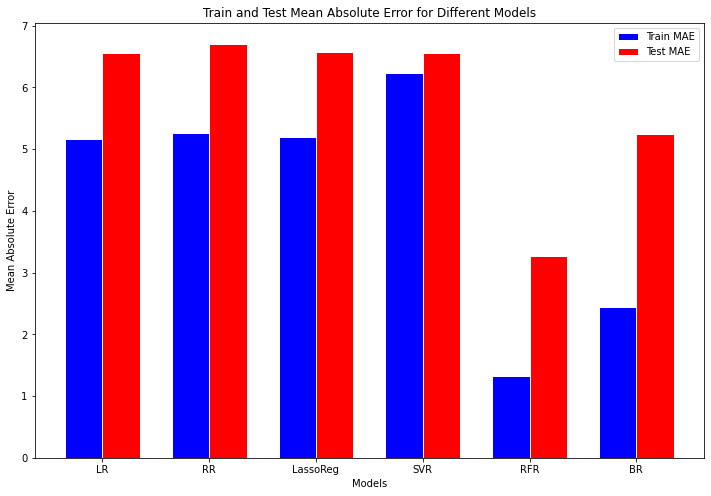

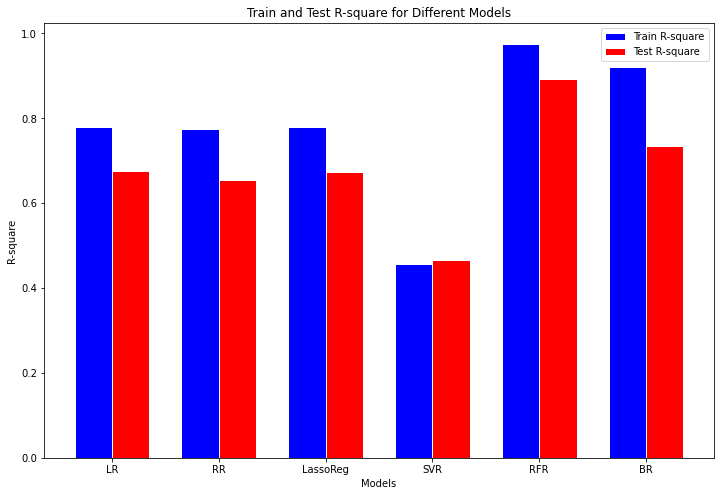

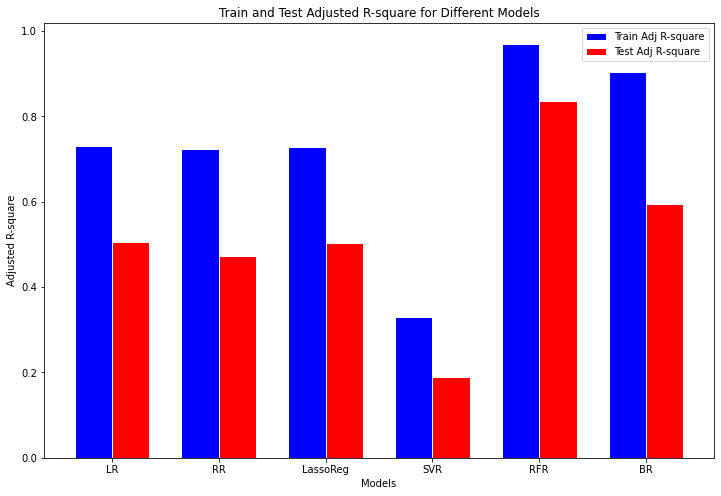

In [19]:
import matplotlib.pyplot as plt

# Extract the required data from the DataFrame
model_names = all_models_df['model']
train_mse = all_models_df['Train Mean Squared Error']
test_mse = all_models_df['Test Mean Squared Error']
train_mae = all_models_df['Train Mean Absolute Error']
test_mae = all_models_df['Test Mean Absolute Error']
train_r2 = all_models_df['Train R Sqaure']
test_r2 = all_models_df['Test R Sqaure']
train_adj_r2 = all_models_df['Train Adj R Sqaure']
test_adj_r2 = all_models_df['Test Adj R Sqaure']

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = range(len(model_names))
r2 = [x + bar_width for x in r1]

# Plotting the train and test accuracy metrics separately for each model
plt.figure(figsize=(12, 8))
plt.bar(r1, train_mse, color='b', width=bar_width, edgecolor='white', label='Train MSE')
plt.bar(r2, test_mse, color='r', width=bar_width, edgecolor='white', label='Test MSE')
plt.xticks([r + bar_width/2 for r in range(len(model_names))], model_names)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Mean Squared Error for Different Models')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.bar(r1, train_mae, color='b', width=bar_width, edgecolor='white', label='Train MAE')
plt.bar(r2, test_mae, color='r', width=bar_width, edgecolor='white', label='Test MAE')
plt.xticks([r + bar_width/2 for r in range(len(model_names))], model_names)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Train and Test Mean Absolute Error for Different Models')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.bar(r1, train_r2, color='b', width=bar_width, edgecolor='white', label='Train R-square')
plt.bar(r2, test_r2, color='r', width=bar_width, edgecolor='white', label='Test R-square')
plt.xticks([r + bar_width/2 for r in range(len(model_names))], model_names)
plt.xlabel('Models')
plt.ylabel('R-square')
plt.title('Train and Test R-square for Different Models')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.bar(r1, train_adj_r2, color='b', width=bar_width, edgecolor='white', label='Train Adj R-square')
plt.bar(r2, test_adj_r2, color='r', width=bar_width, edgecolor='white', label='Test Adj R-square')
plt.xticks([r + bar_width/2 for r in range(len(model_names))], model_names)
plt.xlabel('Models')
plt.ylabel('Adjusted R-square')
plt.title('Train and Test Adjusted R-square for Different Models')
plt.legend()
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Calculate correlation strengths using CAM
def calculate_cam(X):
    m = X.shape[0]
    cam = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            dot_product = np.dot(X[i], X[j])
            norm_product = np.linalg.norm(X[i]) * np.linalg.norm(X[j])
            cam[i, j] = dot_product / norm_product
    return cam

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Support Vector Regression": SVR(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Bagging Regressor": BaggingRegressor()
}

input_parameters = ['LL', 'PL', 'PI', 'OMC', 'SG', 'MDD', 'TS', 'P1', 'P2', 'P3', 'P4', 'NO. OF LAYER', 'lab error']

# Prepare data array X for CAM
X = np.concatenate((x_train, x_test), axis=0)

# Calculate correlation strengths using CAM for each model
report = []
for model_name, model in models.items():
    # Training Model
    model.fit(x_train, y_train)

    # Prediction
    y_train_pred = model.predict(x_train)

    # Calculate correlation strengths for input parameters using CAM
    cam = calculate_cam(X)
    param_cam = np.mean(cam, axis=0)
    param_strengths = param_cam[:-1]  # Exclude the last column which represents the target variable

    # Save the relative strengths of input parameters for the model
    strengths = {param: strength for param, strength in zip(input_parameters, param_strengths)}
    report.append({
        "Model": model_name,
        "Parameter Strengths": strengths
    })

# Print the relative strengths of input parameters for each model
for result in report:
    print(f"Model: {result['Model']}")
    print("Parameter Strengths:")
    for param, strength in result['Parameter Strengths'].items():
        print(f"{param}: {strength:.3f}")
    print()

Model: Linear Regression
Parameter Strengths:
LL: 0.861
PL: 0.833
PI: 0.805
OMC: 0.522
SG: 0.770
MDD: 0.858
TS: 0.851
P1: 0.860
P2: 0.853
P3: 0.858
P4: 0.827
NO. OF LAYER: 0.490
lab error: 0.824

Model: Ridge Regression
Parameter Strengths:
LL: 0.861
PL: 0.833
PI: 0.805
OMC: 0.522
SG: 0.770
MDD: 0.858
TS: 0.851
P1: 0.860
P2: 0.853
P3: 0.858
P4: 0.827
NO. OF LAYER: 0.490
lab error: 0.824

Model: Lasso Regression
Parameter Strengths:
LL: 0.861
PL: 0.833
PI: 0.805
OMC: 0.522
SG: 0.770
MDD: 0.858
TS: 0.851
P1: 0.860
P2: 0.853
P3: 0.858
P4: 0.827
NO. OF LAYER: 0.490
lab error: 0.824

Model: Random Forest Regressor
Parameter Strengths:
LL: 0.861
PL: 0.833
PI: 0.805
OMC: 0.522
SG: 0.770
MDD: 0.858
TS: 0.851
P1: 0.860
P2: 0.853
P3: 0.858
P4: 0.827
NO. OF LAYER: 0.490
lab error: 0.824

Model: Support Vector Regression
Parameter Strengths:
LL: 0.861
PL: 0.833
PI: 0.805
OMC: 0.522
SG: 0.770
MDD: 0.858
TS: 0.851
P1: 0.860
P2: 0.853
P3: 0.858
P4: 0.827
NO. OF LAYER: 0.490
lab error: 0.824

Model: D

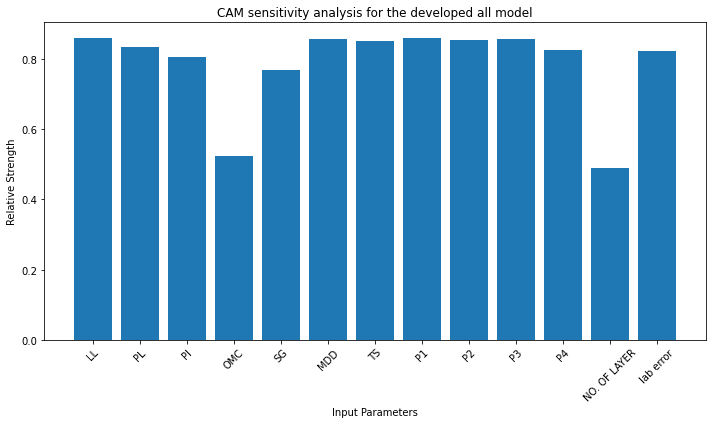

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Find the result for Linear Regression model
linear_regression_result = next(result for result in report if result['Model'] == 'Linear Regression')
strengths = linear_regression_result['Parameter Strengths']

# Prepare data for plotting
param_names = list(input_parameters)
param_strengths = [strengths[param] for param in param_names]

# Plot the relative strengths of input parameters for Linear Regression
plt.figure(figsize=(10, 6))
plt.bar(param_names, param_strengths)
plt.title('CAM sensitivity analysis for the developed all model')
plt.xlabel('Input Parameters')
plt.ylabel('Relative Strength')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()